# **1. Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **2. Load dataset**

In [2]:
#A tally of confirmed and suspected cases in all countries
case = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv")

#Timeline for confirmed cases with respect to date time and other details on every reported case
case_timeline = pd.read_csv("Worldwide_Case_Detection_Timeline.csv")

#Daily number of confirmed cases for all the countries where the virus has entered
case_country = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv")

# **3. Basic exploration**

In [3]:
print(f"Shape of Case Dataset: {case.shape}")
print(f"\nGlimpse of Case Dataset:")
case.head().style.set_properties(**{"background-color": "#254441", "color": "#e9c46a", "border": "1.5px solid black"})

Shape of Case Dataset: (129, 6)

Glimpse of Case Dataset:


,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.000000,0.000000,5.000000,2.000000,7.000000
1,Portugal,908.000000,0.000000,0.000000,0.000000,34.000000
2,Spain,7083.000000,0.000000,13.000000,2.000000,0.000000
3,United States,24403.000000,0.000000,4.000000,41.000000,11.000000
4,Canada,1388.000000,12.000000,1.000000,5.000000,0.000000


In [4]:
print(f"Information of Case Dataset:\n")
print(case.info())

Information of Case Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             129 non-null    object 
 1   Confirmed_Cases     129 non-null    float64
 2   Suspected_Cases     129 non-null    float64
 3   Hospitalized        129 non-null    float64
 4   Travel_History_Yes  129 non-null    float64
 5   Travel_History_No   129 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.2+ KB
None


In [5]:
print(f"Summary of Case Dataset:")
case.describe().T.style.set_properties(**{"background-color": "#254441", "color": "#e9c46a", "border": "1.5px solid black"})

Summary of Case Dataset:


,count,mean,std,min,25%,50%,75%,max
Confirmed_Cases,129.000000,505.542636,2376.143711,0.000000,2.000000,6.000000,77.000000,24403.000000
Suspected_Cases,129.000000,28.472868,254.846647,0.000000,0.000000,0.000000,0.000000,2852.000000
Hospitalized,129.000000,1.170543,2.795432,0.000000,0.000000,0.000000,1.000000,18.000000
Travel_History_Yes,129.000000,2.124031,4.758229,0.000000,0.000000,1.000000,2.000000,41.000000
Travel_History_No,129.000000,0.705426,3.512040,0.000000,0.000000,0.000000,0.000000,34.000000


In [6]:
case.describe(include=object).T.style.set_properties(**{"background-color": "#254441", "color": "#e9c46a", "border": "1.5px solid black"})

,count,unique,top,freq
Country,129,129,England,1


In [7]:
print(f"Null values of Case Dataset:")
case.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#254441", "color": "#e9c46a", "border": "1.5px solid black"})

Null values of Case Dataset:


,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,0,0,0,0,0,0


### **Insights**:
- There is no null value in the Case dataset.
- All countable values are in float datatype.
- These should be converted into int datatype for efficient calculation and representation.

# **4. Custom palette**

In [8]:
sns.set_style("white")
sns.set(rc={"axes.facecolor": "#e9edc9", "figure.facecolor": "#e9edc9"})
sns.set_context("poster", font_scale=.7)

palette = ["#003C30","#01665E","#35978F","#80CDC1","#80CDC1","#F5F5F5","#e9c46a","#DFC27D","#BF812D","#8C510A","#543005"]
palette_cmap = ["#DFC27D","#e9c46a","#DA9B47","#00847A","#01665E","#254441"]

# **5. Analysis**

In [9]:
print(f"\nThere are {len(case['Country'].unique())} countries listed here.\n")
case["Country"].to_frame().T.style.set_properties(**{"background-color": "#254441","color":"#e9c46a","border": "1.5px solid black"})


There are 129 countries listed here.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
Country,England,Portugal,Spain,United States,Canada,Sweden,Italy,France,Belgium,Australia,Germany,Netherlands,Israel,Switzerland,Greece,Austria,Argentina,Denmark,Morocco,Slovenia,Scotland,Czech Republic,United Arab Emirates,Finland,Wales,Northern Ireland,Sudan,Bolivia,Iran,Ecuador,Malta,Ireland,Mexico,Pakistan,French Guiana,Thailand,Peru,Brazil,Malaysia,Hungary,Norway,Paraguay,Costa Rica,Gibraltar,Mauritius,Haiti,Uruguay,Latvia,Cayman Islands,Kosovo,Turkey,Bahamas,Ghana,India,Iceland,Poland,Bangladesh,Uganda,Cambodia,Malawi,Venezuela,Romania,Georgia,Slovakia,Luxembourg,Nepal,Chile,Serbia,Lebanon,South Korea,Singapore,South Africa,Taiwan,Colombia,Croatia,Bulgaria,Somalia,Zambia,Fiji,Benin,Estonia,Puerto Rico,Panama,Dominican Republic,Jamaica,New Zealand,Russia,Bosnia And Herzegovina,Saudi Arabia,Martinique,Barbados,Qatar,Bermuda,Japan,Guadeloupe,Andorra,New Caledonia,China,Philippines,Montenegro,Cyprus,Lithuania,Guatemala,Saint Martin (French part),Greenland,Moldova,Honduras,Monaco,Indonesia,Curaçao,Aruba,Cuba,Guyana,El Salvador,Belize,Hong Kong,South Sudan,Egypt,Jordan,Guam,Ukraine,Bahrain,Nigeria,Democratic Republic Of The Congo,Central African Republic,Republic of Congo,Cameroon,Liberia,Sierra Leone


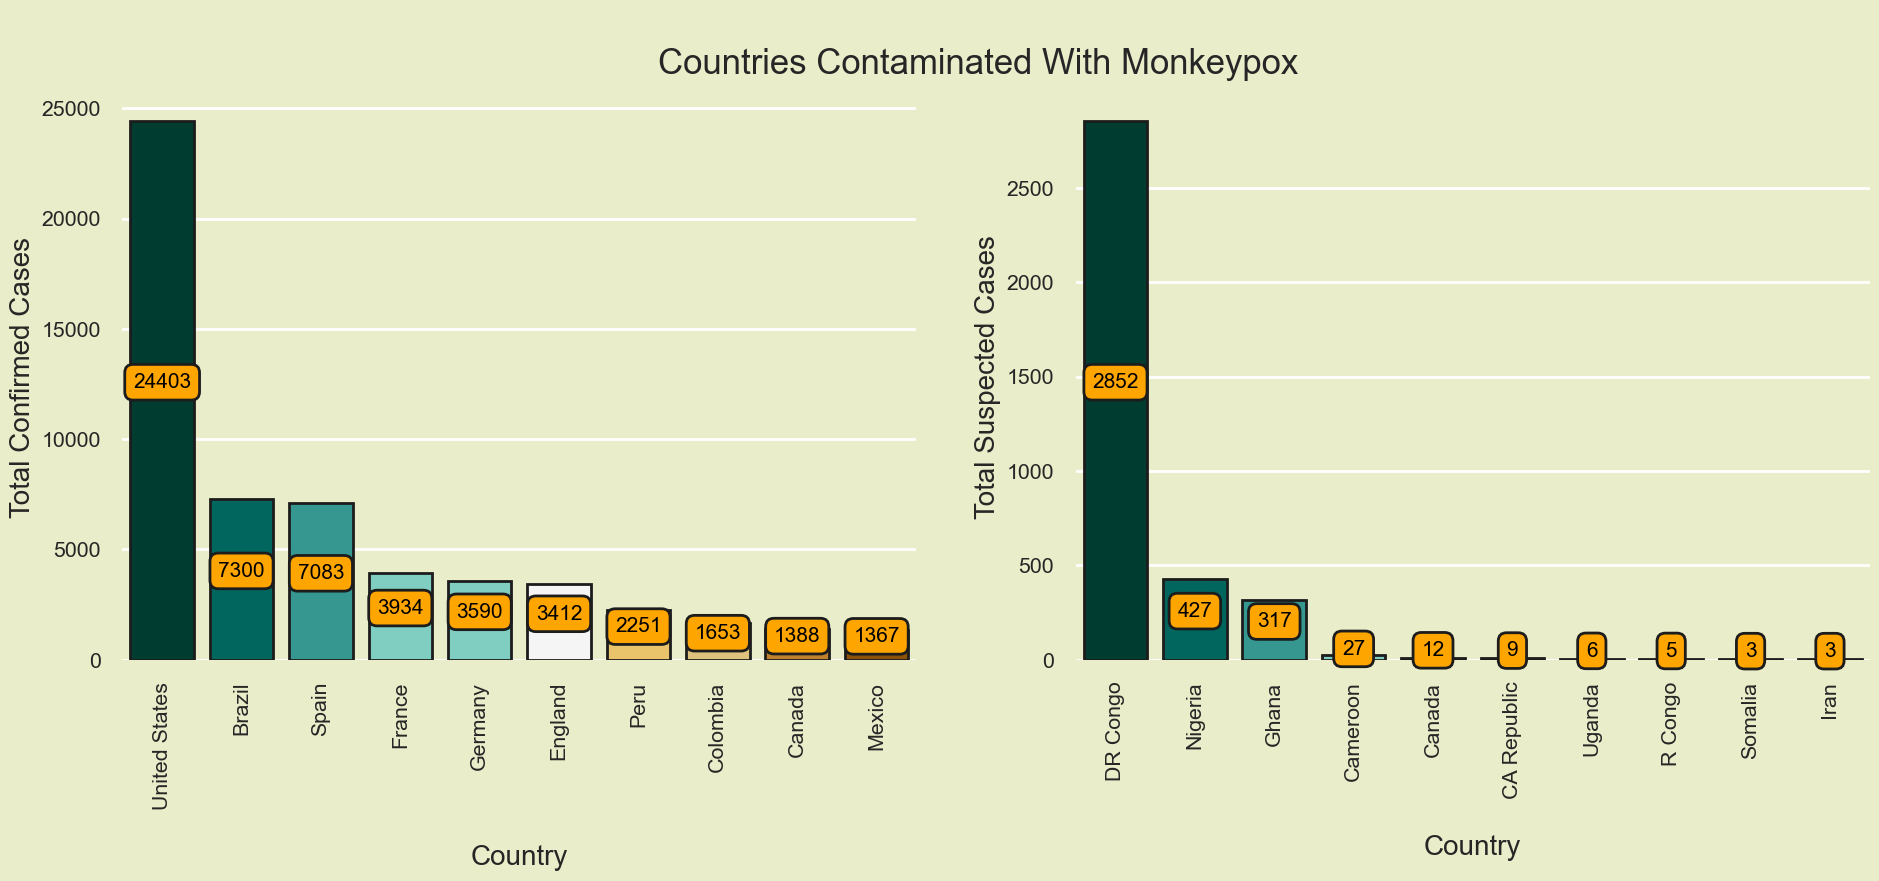

In [10]:
case[["Confirmed_Cases", "Suspected_Cases", "Hospitalized", "Travel_History_Yes", "Travel_History_No"]] = case[["Confirmed_Cases", "Suspected_Cases", "Hospitalized", "Travel_History_Yes", "Travel_History_No"]].astype("int")
case["Total_Cases"] = case[["Confirmed_Cases", "Suspected_Cases"]].sum(axis=1)
case["Country"].replace(to_replace = ["Democratic Republic Of The Congo", "Central African Republic", "Republic of Congo"], value = ["DR Congo", "CA Republic", "R Congo"], inplace = True)

case_temp1 = case.sort_values(["Confirmed_Cases"], ascending=False)
case_temp2 = case.sort_values(["Suspected_Cases"], ascending=False)

_, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.tight_layout(pad=4.0)

sns.barplot(x=case_temp1["Country"][:10], y=case_temp1["Confirmed_Cases"], ax=axs[0], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
axs[0].set_xlabel("\nCountry", fontsize=20)
axs[0].set_ylabel("Total Confirmed Cases", fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type="center", padding=6, size=15, color="black", rotation=0,
                     bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 2, "alpha": 1})

sns.barplot(x=case_temp2["Country"][:10], y=case_temp2["Suspected_Cases"], ax=axs[1], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
axs[1].set_xlabel("\nCountry", fontsize=20)
axs[1].set_ylabel("Total Suspected Cases", fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
for container in axs[1].containers:
    axs[1].bar_label(container, label_type="center", padding=6, size=15, color="black", rotation=0,
                     bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 2, "alpha": 1})

plt.suptitle("\nCountries Contaminated With Monkeypox\n", fontsize=25)
sns.despine(left=True, bottom=True)
plt.show()


### **Insights**:
- United States is leading in confirmed cases followed by Brazil, Spain and others.
- DR Congo is leading in suspected cases followed by Nigeria, Ghana and others.

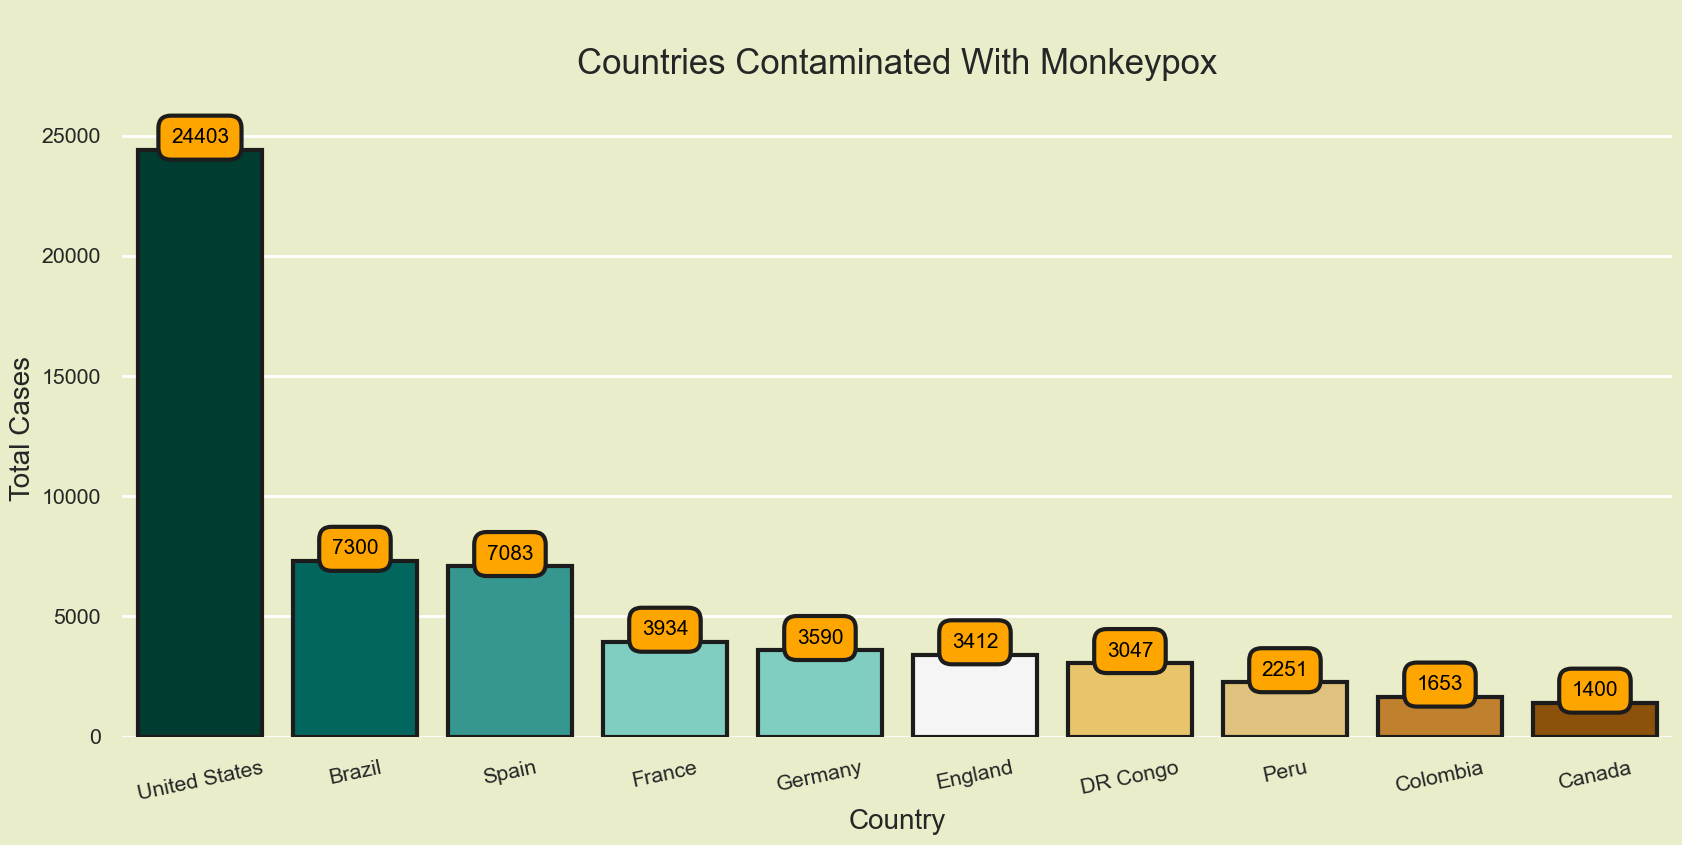

In [15]:
case_temp3 = case.sort_values(["Total_Cases"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=case_temp3["Country"][:10], y=case_temp3["Total_Cases"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.set_title("\nCountries Contaminated With Monkeypox\n", fontsize=25)
p.set_xlabel("Country", fontsize=20)
p.set_ylabel("Total Cases", fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=12)
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

### **Insights**:
- Though DR Congo is leading in the number of suspected cases, United States is leading in the number of total cases, followed by Brazil, Spain and others.

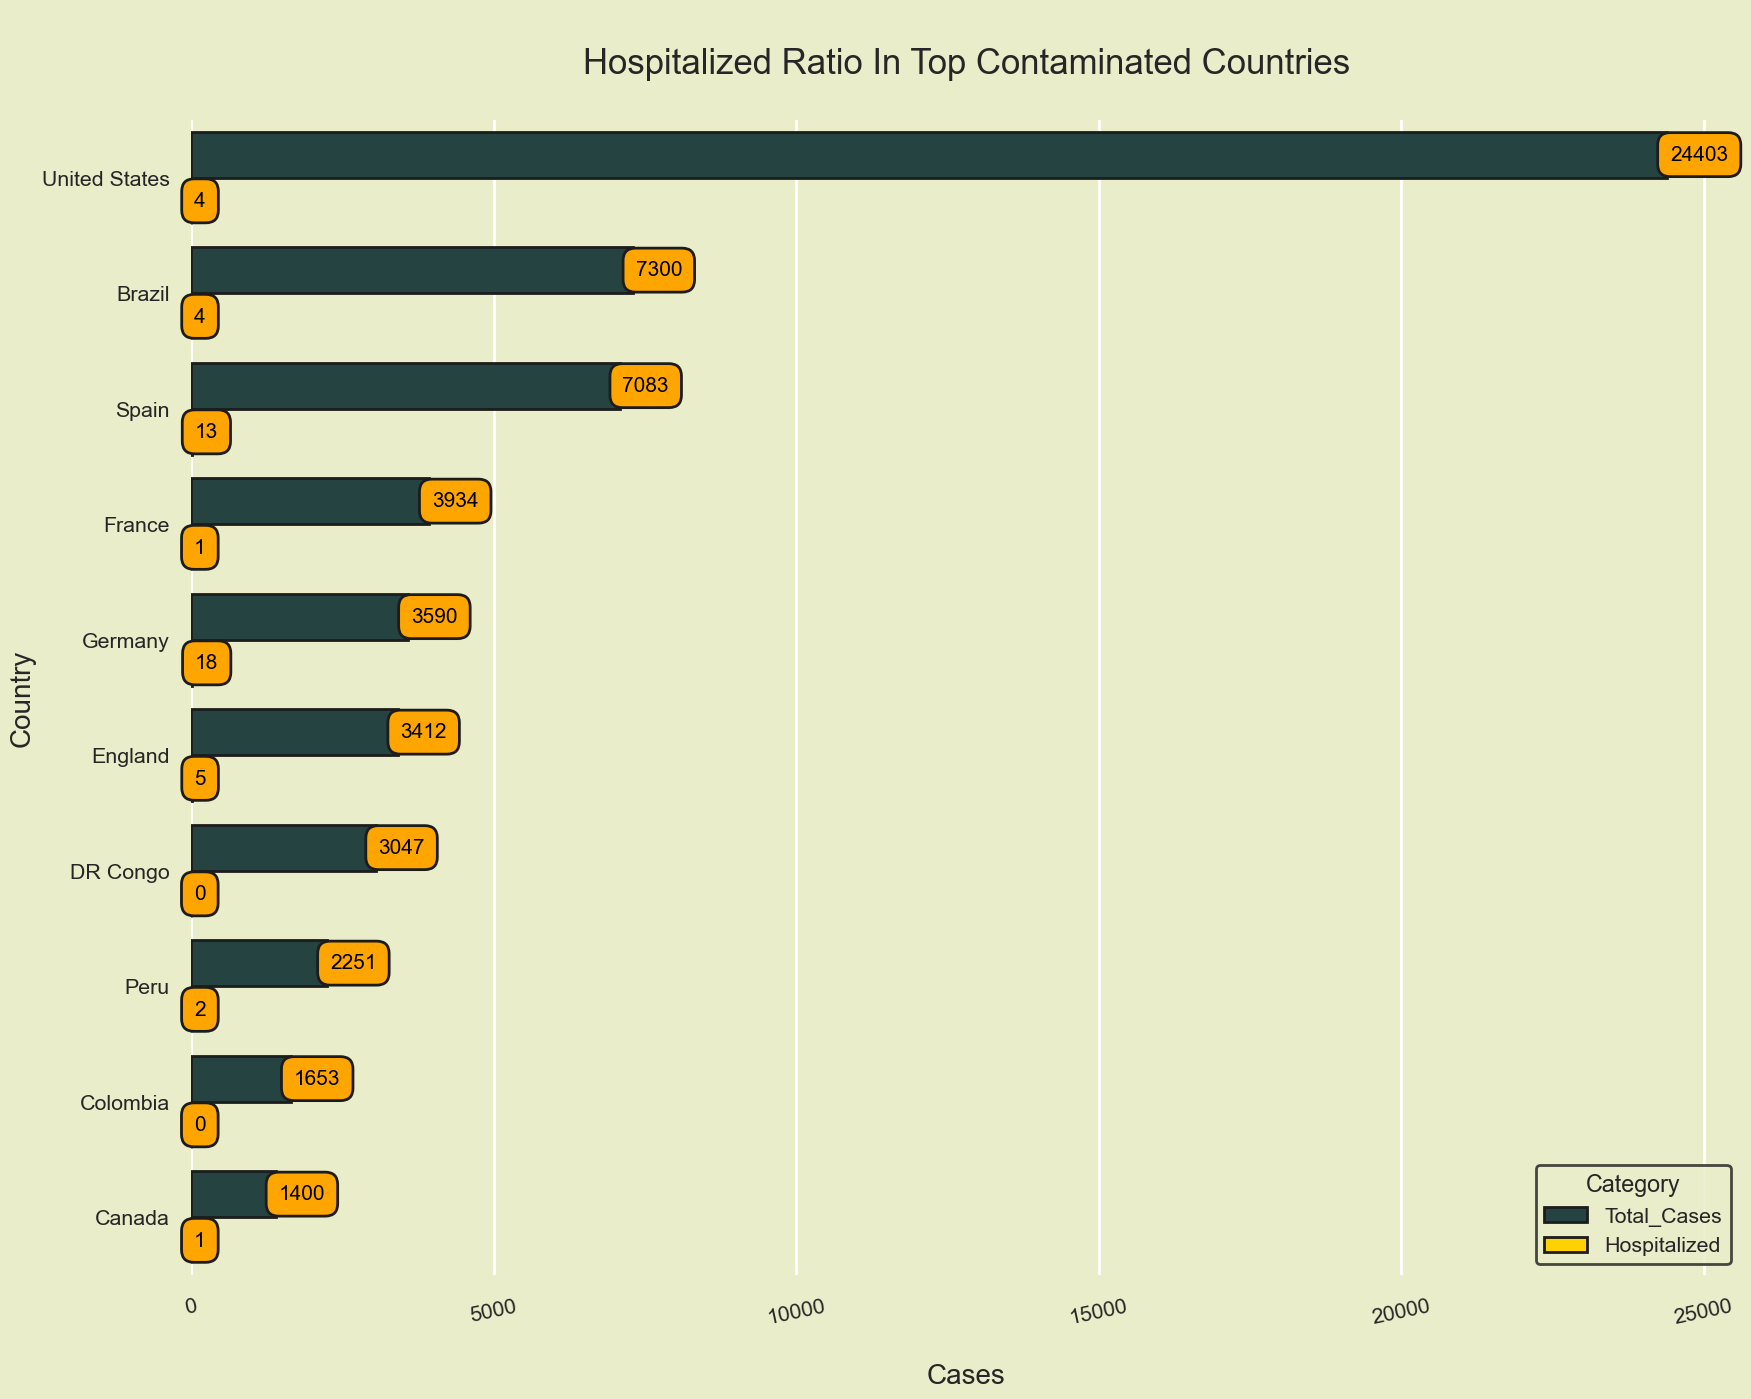

In [16]:
case_temp3_temp = case_temp3[:10]

case_temp3_melt = case_temp3_temp.melt(id_vars=["Country"], value_vars=["Total_Cases", "Hospitalized"],
                                       var_name="Variables", value_name="Values")

plt.subplots(figsize=(20, 15))
p = sns.barplot(y=case_temp3_melt["Country"], x=case_temp3_melt["Values"], hue=case_temp3_melt["Variables"], palette=["#254441", "#ffd100"], saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.set_title("\nHospitalized Ratio In Top Contaminated Countries\n", fontsize=25)
p.set_xlabel("\nCases", fontsize=20)
p.set_ylabel("Country", fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=12)
plt.legend(title="Category", edgecolor="#1c1c1c")
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 2, "alpha": 1})
    
sns.despine(left=True, bottom=True)
plt.show()

### **Insights**:
- United States is leading in the total number of cases but the number of hospitalized cases are not high.
- Germany is leading in hospitalized cases.
- Spain is moving forward with Germany in the number of hospitalized cases though the number of overall cases are not too high yet.

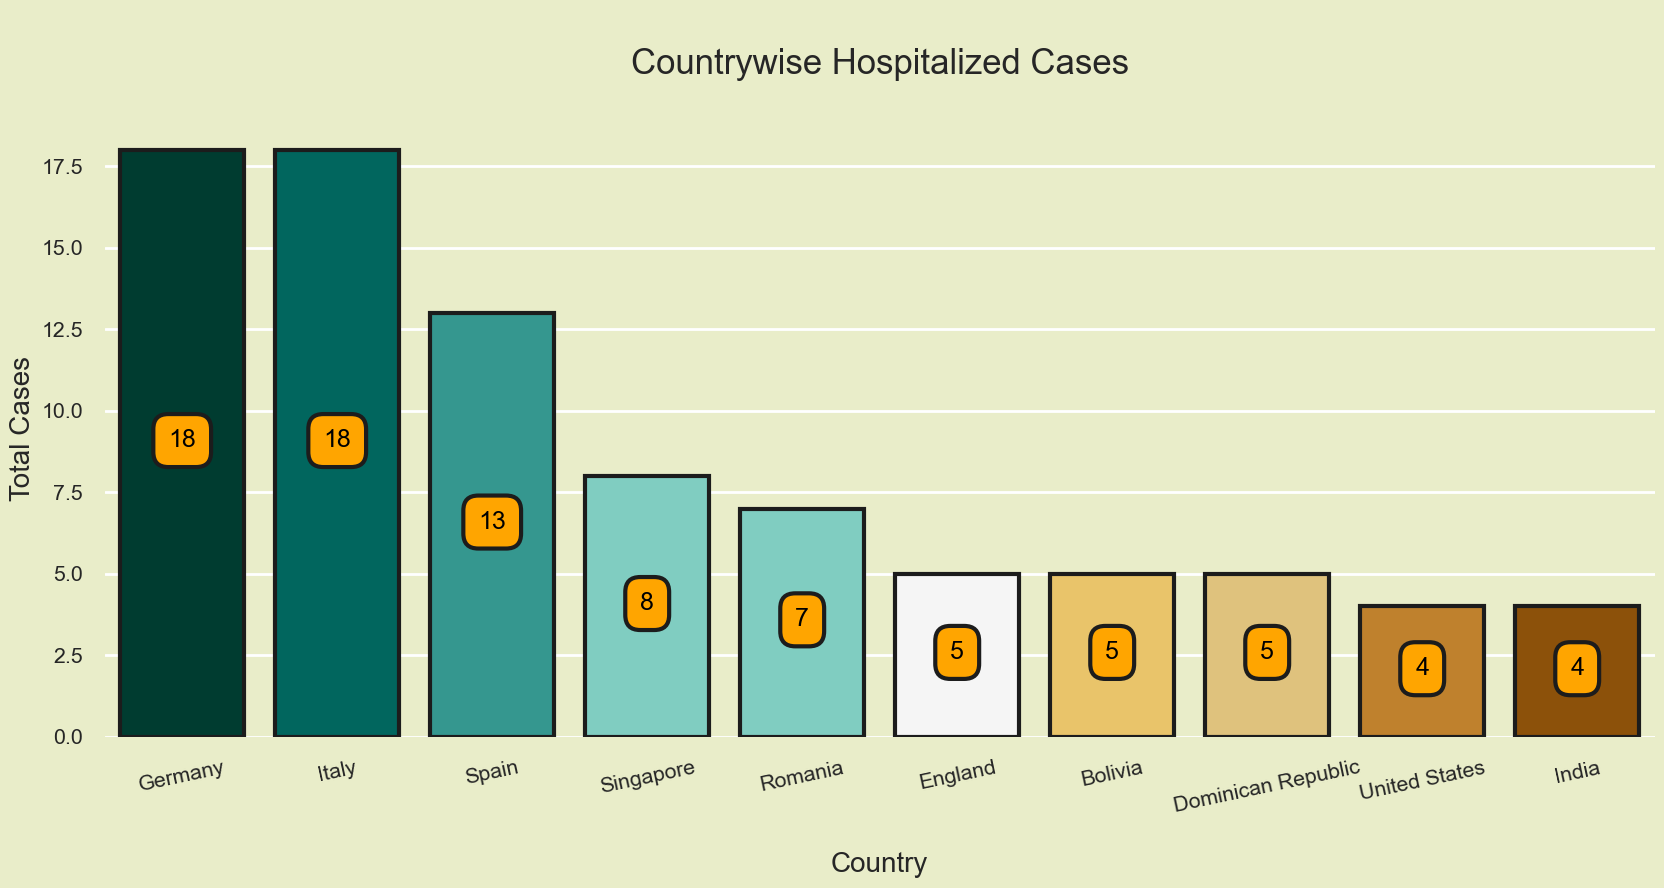

In [17]:
case_temp4 = case.sort_values(["Hospitalized"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=case_temp4["Country"][:10], y=case_temp4["Hospitalized"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.set_title("\nCountrywise Hospitalized Cases\n", fontsize=25)
p.set_xlabel("\nCountry", fontsize=20)
p.set_ylabel("Total Cases", fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=12)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=2, size=18, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth": 3, "alpha": 1})
    
sns.despine(left=True, bottom=True)
plt.show()

### **Insights**:
- The number of hospitalized cases overall is not high.
- Germany and Italy are leading in hospitalized cases followed by Spain, Singapore and others.